In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [8]:
#Import data and check
hopper_df = pd.read_csv("../Downloads/puzzle.csv",header=None, names=['x','y'])
hopper_df.head()

,x,y
0,0.39715,2.113629
1,0.39715,2.113629
2,0.39715,2.113629
3,0.39715,2.113629
4,0.39715,2.113629


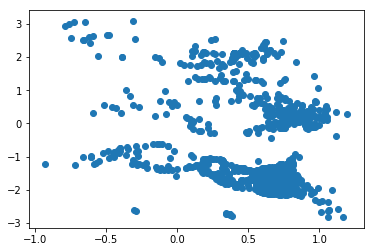

In [9]:
#Alright let's do a scatter plot and see if the 2 variables have any apparent relationship
plt.scatter(hopper_df['x'],hopper_df['y'])
plt.show()

Ok there doesn't appear to be any apparent relationship between the 2 variables. However it looks like there might be some different groups or clusters in the data. Let's have a look at the univariate distributions and see if there's anything interesting there.

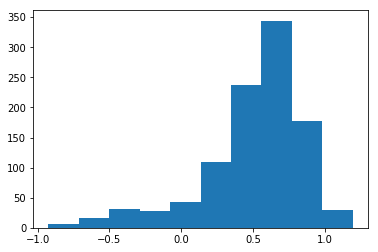

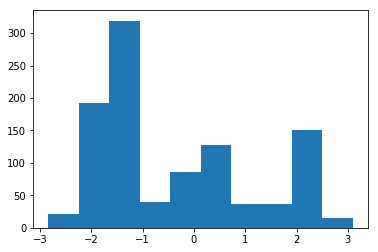

In [105]:
#Plot historgrams of both variables
plt.hist(hopper_df['x'])
plt.show()
plt.hist(hopper_df['y'])
plt.show()

Neither distributions look normal - x appears to be unimodal but left skewed and y appears to be symmetric but distinctly tri-modal. I have a hypothesis as to what this data could be!(I have feeling it's airline data) so let's explore a bit further to check this intuition. 

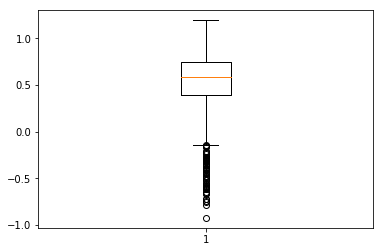

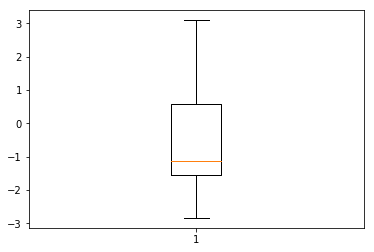

In [108]:
#Boxplots and IQR to check/confirm non-normality and identify any outliers
plt.boxplot(hopper_df['x'])
plt.show()
plt.boxplot(hopper_df['y'])
plt.show()

In [26]:
# Computing IQR
Q1_x = hopper_df['x'].quantile(0.25)
Q3_x = hopper_df['x'].quantile(0.75)
IQR_x = Q3_x - Q1_x
inner_fence_x = [Q1_x-1.5*IQR_x,Q3_x+1.5*IQR_x]
outer_fence_x = [Q1_x-3*IQR_x,Q3_x+3*IQR_x]
hopper_df.loc[(hopper_df['x'] <= inner_fence_x[0]) | (hopper_df['x'] >= inner_fence_x[1]),'x']
hopper_df.loc[(hopper_df['x'] <= outer_fence_x[0]) | (hopper_df['x'] >= outer_fence_x[1]),'x']

644    -0.759033
763    -0.721296
907    -0.785766
939    -0.718224
970    -0.925070
1001   -0.747631
Name: x, dtype: float64

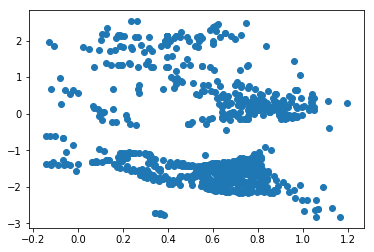

In [28]:
hopper_xf_df = hopper_df.loc[(hopper_df['x'] >= inner_fence_x[0]) & (hopper_df['x'] <= inner_fence_x[1]),:]
plt.scatter(hopper_xf_df['x'],hopper_xf_df['y'])
plt.show()

In [31]:
# Computing IQR
Q1_y = hopper_df['y'].quantile(0.25)
Q3_y = hopper_df['y'].quantile(0.75)
IQR_y = Q3_y - Q1_y
inner_fence_y = [Q1_y-1.5*IQR_y,Q3_y+1.5*IQR_y]
outer_fence_y = [Q1_y-3*IQR_y,Q3_y+3*IQR_y]
hopper_df.loc[(hopper_df['y'] <= inner_fence_y[0]) | (hopper_df['y'] >= inner_fence_y[1]),'y']
hopper_df.loc[(hopper_df['y'] <= outer_fence_y[0]) | (hopper_df['y'] >= outer_fence_y[1]),'y']

Series([], Name: y, dtype: float64)

Appears there are no outliers for y and potentially some outliers for x...doesn't really give us much information so let's go back to distrution of y.
Recall that it was distinctly tri-modal. What happens if we split/segment into 3 groups based on the 3 modes and then plot against x.

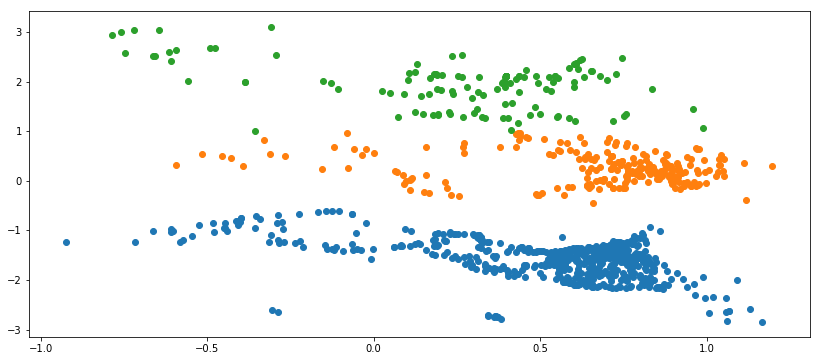

In [112]:
hopper_yf1_df = hopper_df.loc[(hopper_df['y'] >= -4) & (hopper_df['y'] <= -0.5),:]
hopper_yf2_df = hopper_df.loc[(hopper_df['y'] >= -0.5) & (hopper_df['y'] <= 1),:]
hopper_yf3_df = hopper_df.loc[hopper_df['y'] >= 1,:]

#All on the same graph
plt.figure(figsize=(14, 6))
plt.scatter(hopper_yf1_df['x'],hopper_yf1_df['y'])
plt.scatter(hopper_yf2_df['x'],hopper_yf2_df['y'])
plt.scatter(hopper_yf3_df['x'],hopper_yf3_df['y'])
plt.show()

Now this looks very interesting. We can clearly identify 3 distinct groups in the data and we can possibly identify a trend along x. It's hard to identify what x represents but I have a feeling it's time so let's replace the axis with time and see how that looks.

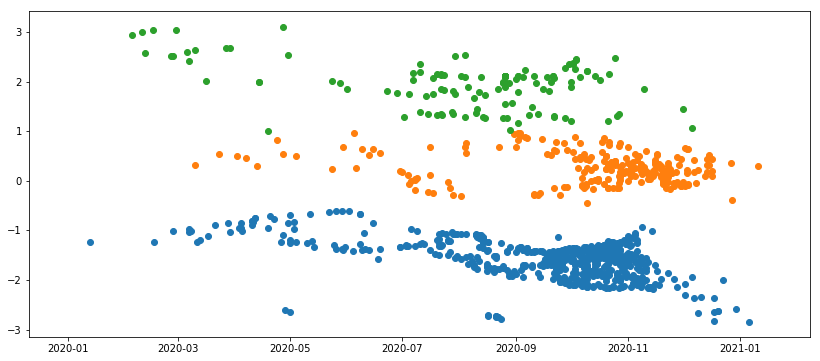

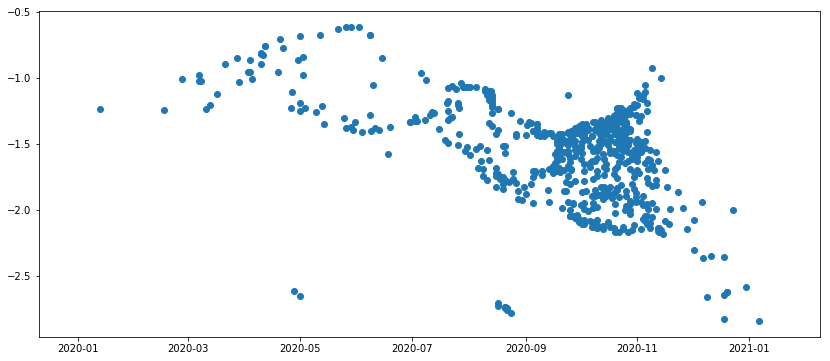

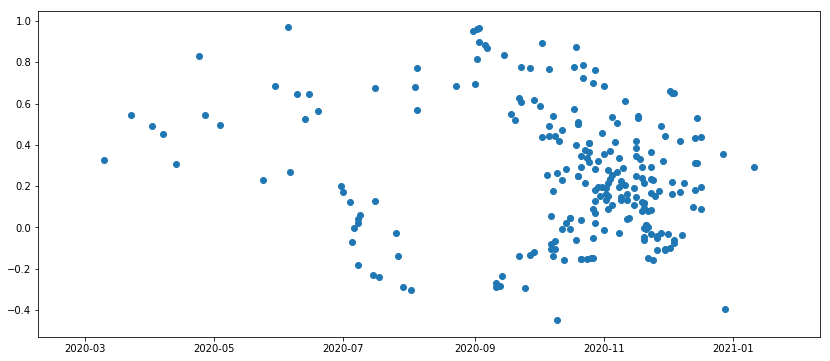

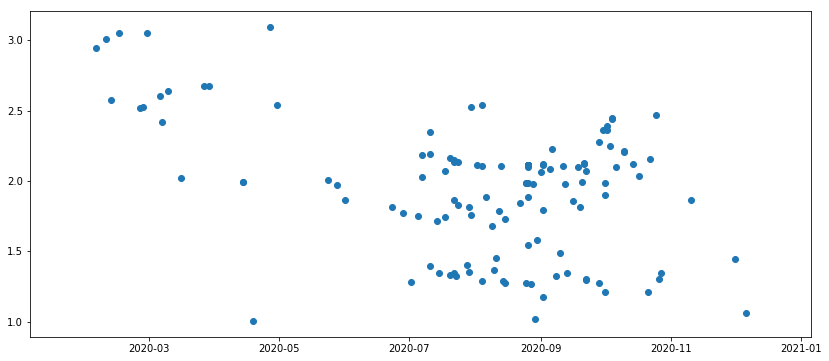

In [111]:
days = np.interp(hopper_df['x'], (hopper_df['x'].min(), hopper_df['x'].max()), (1, 365))
date_list = [datetime.strptime('%s-2020'%int(np.floor(d)),"%j-%Y") + timedelta(days=12) for d in days]

hopper_t_df = hopper_df.copy()
hopper_t_df['x'] = date_list

hopper_yt1_df = hopper_t_df.loc[(hopper_df['y'] >= -4) & (hopper_t_df['y'] <= -0.5),:]
hopper_yt2_df = hopper_t_df.loc[(hopper_df['y'] >= -0.5) & (hopper_t_df['y'] <= 1),:]
hopper_yt3_df = hopper_t_df.loc[hopper_df['y'] >= 1,:]

#All on the same graph
plt.figure(figsize=(14, 6))
plt.scatter(hopper_yt1_df['x'],hopper_yt1_df['y'])
plt.scatter(hopper_yt2_df['x'],hopper_yt2_df['y'])
plt.scatter(hopper_yt3_df['x'],hopper_yt3_df['y'])
plt.show()

#Plot separately
plt.figure(figsize=(14, 6))
plt.scatter(hopper_yt1_df['x'],hopper_yt1_df['y'])
plt.show()
plt.figure(figsize=(14, 6))
plt.scatter(hopper_yt2_df['x'],hopper_yt2_df['y'])
plt.show()
plt.figure(figsize=(14, 6))
plt.scatter(hopper_yt3_df['x'],hopper_yt3_df['y'])
plt.show()

So here's my hypothesis and reasoning on what I think this data represents:

The 3 groups represent the different airline classes (Economy,Business,1st) - the higher values for y represent the price of tickets and the data points represent bookings/volume. Economy has the lowest price and highest volume and 1st class has the highest price and lowest volume. 

The x axis appears to represent time - seemingly over the last year. The skewed distribution and presence of outliers supports this view - volume over time has changed significantly over the year. At the start of the lockdown, volume were almost non-existent and the outliers would represent this time. 

And the overall trend is also consistent with this year - after the intial lockdowns, travel was almost halted so volumes were low but prices were high (due to lower supply - airlines cutting costs, grounding the majority of their fleets). As travel has slowly picked up and supply and demand have both increased, we can see the increase in volumes and reduction in prices as airlines started increasing operations again. We then see an increase in volume and prices (presumably driven by demand) around holiday season (Nov/Dec), which I recall was the busiest travel time this year. Following this we see the expected seasonal dip around Dec/Jan following the holidays - which seems to be further exacaberated this year by rising covid cases again. 

We can also see the different behaviour amongst the airline classes - Economy and 1st class seem to follow a seasonal trend with an increase in volume around holidays follwed by a dip. This variable and seasonal demand is also reflected in the prices - we can see an increase around the peak holiday season this year followed by a dip (potentially due to post-holiday sales). This is in contrast to business class where we can see fairly consistent volume and prices through the year (once post-covid travel started picking up again). Both scenarios are consistent with my hypothesis - business travel is known to be consistent throughout the year whereas consumer travel is known to be very seasonal. 